In [1]:
# Using this location as a root Directory
import os
ROOT = "/content/drive/MyDrive/Colab Notebooks/Deep learning"
os.chdir(ROOT)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Checking all the avaliable files
os.listdir()

['logs',
 'model_ckp.h5',
 'model.h5',
 'ANN_with_callbacks.ipynb',
 'Handwritten Digit Classification.ipynb',
 'SAVED_MODELS',
 'project1',
 'project3',
 'APS_in_dl.ipynb',
 'Mnest.ipynb',
 'activation function.ipynb',
 'Batch Normalization.ipynb',
 'Dataset',
 'Internship-token.json',
 'secure-connect-internship.zip',
 'CNN basics .ipynb',
 'Inception Cifar10.ipynb',
 'Keras Hyperparameter Tuning.ipynb']

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import tensorflow as tf
import seaborn as sns


In [5]:
# loading the dataset
mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 127,
        182, 185, 161, 120,  55,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 198, 251, 255,
        251, 249, 247, 255, 252, 214, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0, 233, 252, 237, 239,
        234, 237, 235, 237, 237, 254, 227,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  16, 210, 225, 215, 175,
        217, 216, 193, 196, 226, 221, 209,  50,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 199, 229, 232, 230, 245, 204,
        219, 253, 245, 207, 194, 223, 231, 236, 235,   0,   0,   3,   0,
          0,   0],
       [  

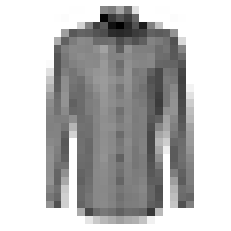

In [8]:
plt.imshow(X_train_full[3000],cmap="binary")
plt.axis("off")
plt.show()

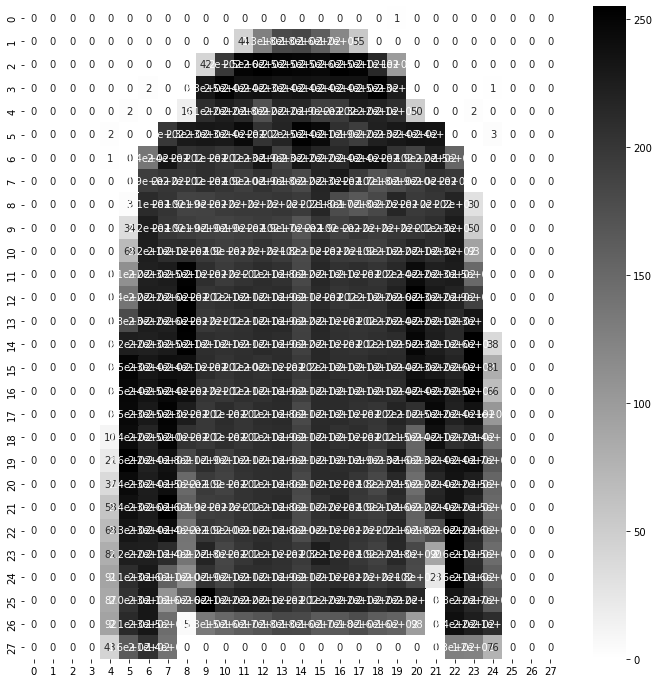

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train_full[5000], annot=True, cmap="binary")
plt.show()

In [10]:
# splitting the dataset into training and validation part and normalizing them to 0 to 1
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

In [11]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((55000, 28, 28), (5000, 28, 28), (55000,), (5000,))

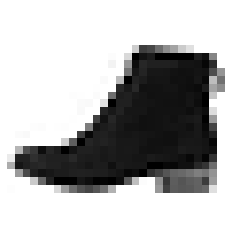

In [12]:
# Ploting the data in X_train
plt.imshow(X_train[2000], cmap="binary")
plt.axis("off")
plt.show()

In [13]:
# Checking what its label
y_train[2000]

9

In [14]:
# Creating the layers
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]

In [15]:
# Creating the model
model = tf.keras.models.Sequential(LAYERS)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "ADAM"
METRICS = ["accuracy"]

In [18]:
model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [19]:
model.layers[1].name

'hiddenLayer1'

In [20]:
hidden1=model.layers[1]

In [21]:
weights, bias = hidden1.get_weights()

In [22]:
EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/10
1719/1719 [==============================] - 11s 4ms/step - loss: 0.4889 - accuracy: 0.8256 - val_loss: 0.3919 - val_accuracy: 0.8590
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3643 - accuracy: 0.8665 - val_loss: 0.3737 - val_accuracy: 0.8690
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3285 - accuracy: 0.8781 - val_loss: 0.3304 - val_accuracy: 0.8800
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3044 - accuracy: 0.8865 - val_loss: 0.3054 - val_accuracy: 0.8892
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2845 - accuracy: 0.8932 - val_loss: 0.3228 - val_accuracy: 0.8816
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2707 - accuracy: 0.8988 - val_loss: 0.3073 - val_accuracy: 0.8886
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2587 - accuracy: 0.9017 - val_loss: 0.3155 - val_accuracy

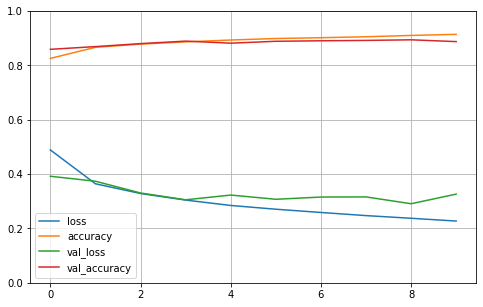

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
model.evaluate(X_test,y_test)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.3673 - accuracy: 0.8707


0.8707000017166138

# **Keras Hyperparameter tuning**

In [25]:
!pip install keras-tuner 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.6 MB/s eta 0:00:00


In [44]:
from tensorflow import keras
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [45]:
# Defining a function to build a model
def build_model(hp):# hp means hyper parameter
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    # Proving the range of numbers in the neuron(hidden layer)
    model.add(Dense(units=hp.Int('num_of_neurons', min_value=32, max_value=512, step=32), activation="relu"))

    # Output Layer
    model.add(Dense(10, activation="softmax"))

    # compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [46]:
tuner = RandomSearch(build_model, objective="val_accuracy", max_trials=5, executions_per_trial=3, directory="tuner1",
                     project_name="clothing")

In [47]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
num_of_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [48]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 5 Complete [00h 03m 14s]
val_accuracy: 0.8454000155131022

Best val_accuracy So Far: 0.8767666618029276
Total elapsed time: 00h 18m 34s


In [50]:
# First one is the best
tuner.results_summary()

Results summary
Results in tuner1/clothing
Showing 10 best trials
Trial summary
Hyperparameters:
num_of_neurons: 512
learning_rate: 0.0001
Score: 0.8767666618029276
Trial summary
Hyperparameters:
num_of_neurons: 352
learning_rate: 0.0001
Score: 0.8741000096003214
Trial summary
Hyperparameters:
num_of_neurons: 32
learning_rate: 0.001
Score: 0.8721666733423868
Trial summary
Hyperparameters:
num_of_neurons: 160
learning_rate: 0.01
Score: 0.8544999957084656
Trial summary
Hyperparameters:
num_of_neurons: 32
learning_rate: 0.0001
Score: 0.8454000155131022


In [51]:
# Defining a function to build a model
def build_model(hp):# hp means hyper parameter
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    # Proving the range of numbers in the neuron(hidden layer)
    for i in range(hp.Int('num_of_neurons', 2, 20)):
        model.add(Dense(units=hp.Int('num_of_neurons' + str(i), min_value=32, max_value=512, step=32), activation="relu"))

    # Output Layer
    model.add(Dense(10, activation="softmax"))

    # compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [52]:
tuner = RandomSearch(build_model, objective="val_accuracy", max_trials=5, executions_per_trial=3, directory="project",
                     project_name="clothing")

In [53]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_of_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
num_of_neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [54]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 5 Complete [00h 03m 48s]
val_accuracy: 0.8679333329200745

Best val_accuracy So Far: 0.8681666652361552
Total elapsed time: 00h 24m 04s


In [56]:
# First one is the best
tuner.results_summary()


Results summary
Results in project/clothing
Showing 10 best trials
Trial summary
Hyperparameters:
num_of_neurons: 11
num_of_neurons0: 288
num_of_neurons1: 288
learning_rate: 0.001
num_of_neurons2: 288
num_of_neurons3: 160
num_of_neurons4: 32
num_of_neurons5: 384
num_of_neurons6: 256
num_of_neurons7: 512
num_of_neurons8: 192
num_of_neurons9: 512
num_of_neurons10: 384
num_of_neurons11: 448
num_of_neurons12: 384
num_of_neurons13: 320
num_of_neurons14: 128
num_of_neurons15: 64
num_of_neurons16: 320
num_of_neurons17: 384
num_of_neurons18: 160
num_of_neurons19: 64
Score: 0.8681666652361552
Trial summary
Hyperparameters:
num_of_neurons: 2
num_of_neurons0: 128
num_of_neurons1: 32
learning_rate: 0.0001
num_of_neurons2: 448
num_of_neurons3: 160
num_of_neurons4: 416
num_of_neurons5: 512
num_of_neurons6: 416
num_of_neurons7: 192
num_of_neurons8: 512
num_of_neurons9: 224
num_of_neurons10: 96
num_of_neurons11: 64
num_of_neurons12: 256
num_of_neurons13: 480
num_of_neurons14: 320
num_of_neurons15: 96
